In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2

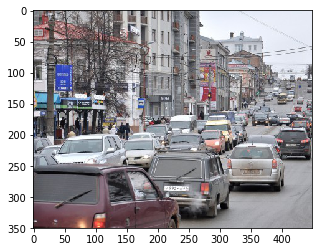

In [3]:
image=cv2.cvtColor(cv2.imread('mashiny_3.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [5]:
gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [7]:
array = gray_scale.flatten()

hist = sorted(array)
num_pix = len(array)

In [9]:
hist = cv2.calcHist([gray_scale],[0],None,[256],[0,256])

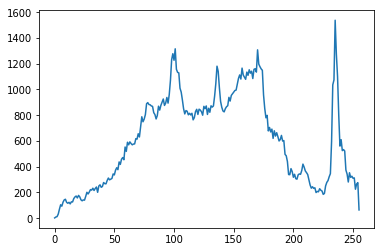

In [10]:
plt.plot(hist)

In [11]:
hist.shape

(256, 1)

In [12]:
histo,bins = np.histogram(gray_scale.flatten(),256,[0,256])

In [13]:
quantile = 0.05
req_sum = int(num_pix * 0.05)
summ = 0
index = -1
for i,v in enumerate(histo):
    summ+=v
    if summ > req_sum:
        index = i
        break
index_start = index

In [14]:
quantile = 0.05
req_sum = int(num_pix * 0.05)
summ = 0
index = -1
for i,v in enumerate(reversed(histo)):
    summ+=v
    if summ > req_sum:
        index = i
        break
index_end = len(histo) - index

In [15]:
print(index_start,index_end)

46 238


In [16]:
def relu(x):
    if x < index_start:
        return 0
    if x >= index_end:
        return 255
    return (x - index_end) * 255 / (index_end - index_start) + 255

In [17]:
lookup_table = np.zeros(256, dtype=np.uint8)
for i in range(256):
    lookup_table[i] = int(relu(i))

In [18]:
lookup_table

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   2,   3,   5,   6,
         7,   9,  10,  11,  13,  14,  15,  17,  18,  19,  21,  22,  23,
        25,  26,  27,  29,  30,  31,  33,  34,  35,  37,  38,  39,  41,
        42,  43,  45,  46,  47,  49,  50,  51,  53,  54,  55,  57,  58,
        59,  61,  62,  63,  65,  66,  67,  69,  70,  71,  73,  74,  75,
        77,  78,  79,  81,  82,  83,  85,  86,  87,  88,  90,  91,  92,
        94,  95,  96,  98,  99, 100, 102, 103, 104, 106, 107, 108, 110,
       111, 112, 114, 115, 116, 118, 119, 120, 122, 123, 124, 126, 127,
       128, 130, 131, 132, 134, 135, 136, 138, 139, 140, 142, 143, 144,
       146, 147, 148, 150, 151, 152, 154, 155, 156, 158, 159, 160, 162,
       163, 164, 166, 167, 168, 170, 171, 172, 173, 175, 176, 17

In [19]:
%time
copslow = gray.copy()
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        copslow[i,j] = relu(gray[i,j])

Wall time: 0 ns


In [21]:
%time
cop = gray.copy()
cop = cv2.LUT(cop, lookup_table) 

Wall time: 0 ns


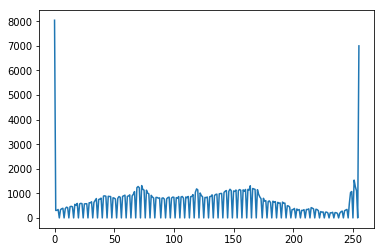

In [23]:
hist = cv2.calcHist([copslow],[0],None,[256],[0,256])
plt.plot(hist)

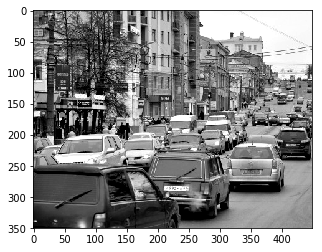

In [24]:
plt.imshow(copslow, cmap='gray')

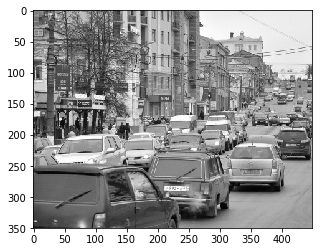

In [25]:
plt.imshow(gray,cmap='gray')